In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [2]:
#Configuring Settings
pd.set_option("mode.copy_on_write", True)
pd.set_option("display.max_colwidth",200)

In [3]:
# Downloading the datasets
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Importing the dataset
df = pd.read_csv("../../01_Data/01_Raw/raw_tweets.csv")
df.sample(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
4670,4808,3,0,1,2,2,"@Selecta_kerry I seeing ppl saying running a train on a bird, and a parry is the same thing, but das not what I know..so looking for clarity"
18230,18635,3,0,3,0,1,RT @ZitlalyL: @Vic_Manzan0 just like you&#128076;&#128079; you pulled all them track bitches &#128514;
15559,15924,3,0,3,0,1,"RT @IEatHeartsBitch: If you tell her the dick good she gone wanna try, tell her it's wack she gone wanna see for herself. A hoe gone be a h&#8230;"
8324,8554,3,1,2,0,1,Can this bitch sit the fuck down and shut the fuck up
2210,2255,3,0,3,0,1,100 mile dead zone radius around Philly...gotta go to NY or DC RT @CeeRoss The tri state needs better bitches


In [5]:
# Dropping the columns that are not needed
df = df[["class", "tweet"]]
df.sample(5)

,class,tweet
19686,2,"RT @minhazmerchant: Sonia never criticises Kejriwal. Kejriwal, who trashes every other leader, never criticises Sonia. Touching."
16091,2,"RT @KySportsRadio: For years two fan bases (UNC and Indiana) have said they do things ""the right way"" while UK and others are rogues. My ho&#8230;"
4330,2,@OfficialCCane naah da twitter bird &#128542;
12124,1,Just dropped dat fine ass woman @GingerDemoness. We has da best chicken eva. I spectin some lovin but she a lady and da colored thang
15064,1,RT @DrummerKid0328: Sike nah &#128514;&#128514;&#128514; that bitch be havin me buggin


In [6]:
#get rows which have https in tweet
df.loc[df["tweet"].str.contains("https", na=False)].sample(5)

,class,tweet
15694,1,RT @JAYREIDOFFICIAL: Check out JOY and PAIN my nicca @Im_Yung_Jay #mme1636 #blackkingz https://t.co/EZuQc2KnYG
273,1,"""@VineForTheByrd: On my way to fuck your bitch https://t.co/4lMTFNL2iy""\n\nLMFAO KITTYCOPTER"
16292,1,"RT @LoyalPeopleOnly: Kanye was like... ""If ANY of you bitches even THINK about attacking me in the elevator&#128527;""\n\nhttps://t.co/1TI5K1f1sf"
18281,1,"RT @_Foreverfamous_: ""@vintage_monroe_: &#8220;@VineForTheByrd: Girlfriends Be Like....&#128514;&#128557;&#128588;&#128175; https://t.co/QM5XDxNQyN&#8221;bitch we don't want him""&#128514;&#128514;..."
336,2,"""@hxhassan: Jihadi patron Hajjaj al-Ajmi is arrested at Kuwait airport https://t.co/ZmloKfWDQl"""


In [7]:
df.iloc[12955, :]

class                                                                                                                                             1
tweet    My baby Lexy. She is a whole ain't shit bitch in the winter. Sorry ass RWD that's her only flaw. Still love you tho http://t.co/5UGfhrdrxT
Name: 12955, dtype: object

# Data Cleaning Process Starts Here

In [8]:
# create helper colums for cleaning
df["clean_tweet"] = df["tweet"].astype(str)

In [9]:
# Convert all the text to lower case
df["clean_tweet"] = df["clean_tweet"].str.lower()

In [10]:
# removing URLS
def remove_URL(text):
    text = re.sub(r"http\S+", "", text)
    return text


df["clean_tweet"] = df["clean_tweet"].apply(remove_URL)

In [11]:
# removing mentions
def remove_mentions(text):
    return re.sub(r"@\w+", "", text)


df["clean_tweet"] = df["clean_tweet"].apply(remove_mentions)

In [12]:
# removing hashtags
def remove_hashtags(text):
    return re.sub(r"#\w+", "", text)


df["clean_tweet"] = df["clean_tweet"].apply(remove_hashtags)

In [13]:
# removing special characters and numbers
spl_chrs = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"


def remove_spl_chrs(text):
    text = "".join([_ for _ in text if _ not in spl_chrs])
    text = re.sub("[0-9]+", "", text)
    return text


df["clean_tweet"] = df["clean_tweet"].apply(lambda x: remove_spl_chrs(x))

In [14]:
# removing stopwords
stop = stopwords.words("english")
df["clean_tweet"] = df["clean_tweet"].apply(
    lambda x: " ".join([word for word in x.split() if word not in (stop)])
)

In [15]:
# removing retweet
def remove_rt(text):
    return re.sub("^[rt]+", "", text)


df["clean_tweet"] = df["clean_tweet"].apply(remove_rt)

In [16]:
df["tokenized"] = df["clean_tweet"].apply(word_tokenize)

In [17]:
df.sample(5)

,class,tweet,clean_tweet,tokenized
14494,1,RT @BrooksBeau: Follow spree cunts. Just retweet this #followmeBeau,follow spree cunts retweet,"[follow, spree, cunts, retweet]"
7406,2,A Yankee win makes any day better.,yankee win makes day better,"[yankee, win, makes, day, better]"
5474,2,@aj2amazing Obispo ho. We'll do it big,obispo ho well big,"[obispo, ho, well, big]"
7640,1,"All these hoes fucking, but they don't want to seem like a hoe so you gotta hit em on the low.",hoes fucking dont want seem like hoe gotta hit em low,"[hoes, fucking, dont, want, seem, like, hoe, got, ta, hit, em, low]"
18808,1,RT @crissstaaaaal: If unfollow me you're a little bitch cus you couldn't handle my tweets lol,unfollow youre little bitch cus couldnt handle tweets lol,"[unfollow, youre, little, bitch, cus, couldnt, handle, tweets, lol]"


In [18]:
#Confirm if HTTPs are removed
df.iloc[12955,:]

class                                                                                                                                                   1
tweet          My baby Lexy. She is a whole ain't shit bitch in the winter. Sorry ass RWD that's her only flaw. Still love you tho http://t.co/5UGfhrdrxT
clean_tweet                                                                baby lexy whole aint shit bitch winter sorry ass rwd thats flaw still love tho
tokenized                                                  [baby, lexy, whole, aint, shit, bitch, winter, sorry, ass, rwd, thats, flaw, still, love, tho]
Name: 12955, dtype: object

# Data Stemming and Lematization

In [19]:
# Stemming
ps = nltk.PorterStemmer()


def stemming(text):
    text = [ps.stem(word) for word in text]
    return text


df["tokenized"] = df["tokenized"].apply(lambda x: stemming(x))

In [20]:
# Lemmatization
wn = nltk.WordNetLemmatizer()


def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text


df["tokenized"] = df["tokenized"].apply(lambda x: lemmatizer(x))

In [21]:
# regenrate the clean tweet
def regen_tweet(text):
    return " ".join(text)
df["clean_tweet"] = df["tokenized"].apply(lambda x: regen_tweet(x))

In [22]:
df.sample(5)

,class,tweet,clean_tweet,tokenized
16170,1,RT @Leelucas_: @100046729 man bitch you then fucked up. I'll burn yall house down again hoe &#128514;. That's why bumble bee your real grandma hoe,man bitch fuck ill burn yall hous hoe that bumbl bee real grandma hoe,"[man, bitch, fuck, ill, burn, yall, hous, hoe, that, bumbl, bee, real, grandma, hoe]"
7661,1,All you ladies pop your pussy like this,ladi pop pussi like,"[ladi, pop, pussi, like]"
14001,1,RT @1WayHustle: Bitches love niggas that got bitches,bitch love nigga got bitch,"[bitch, love, nigga, got, bitch]"
6821,2,"@pcrossvol there's always one...they never realize they are the worst- the unsolicited unaffiliated trash talker""",here alway onethey never realiz worst unsolicit unaffili trash talker,"[here, alway, onethey, never, realiz, worst, unsolicit, unaffili, trash, talker]"
15887,1,RT @Just2Savage: This height shit aint cute at all. Yall some dumb hoes going out in public looking like Jack and the bean stalk. &#128514; http://&#8230;,height shit aint cute yall dumb hoe go public look like jack bean stalk,"[height, shit, aint, cute, yall, dumb, hoe, go, public, look, like, jack, bean, stalk]"


# Data Selection

In [23]:
# Dropping category 0 from the dataset since it has low values as seen in the EDA
df = df[df["class"] != 0]

In [24]:
df["Length"] = df["tokenized"].apply(len)

In [25]:
# Dropping tweets with 0 length
df = df[df["Length"] != 0]

In [26]:
# Generating simple label for easy identification
df["offensive"] = df["class"].apply(lambda x: "Yes" if x == 1 else "No")

In [27]:
df.sample(5)

,class,tweet,clean_tweet,tokenized,Length,offensive
9220,1,"Fuccn yo bitch last night she say ""you the nigga!!'",fuccn yo bitch last night say nigga,"[fuccn, yo, bitch, last, night, say, nigga]",7,Yes
4723,2,@SoWavyTee hey Hun!,hey hun,"[hey, hun]",2,No
21028,1,Some girls think being a bitch and having an attitude is attractive. Who tf made you think that??,girl think bitch attitud attract tf made think,"[girl, think, bitch, attitud, attract, tf, made, think]",8,Yes
1259,1,&#8220;@FullaCharisma And happy to be hoes too. Smh.&#8221;better than being in denial,happi hoe smhbetter denial,"[happi, hoe, smhbetter, denial]",4,Yes
24240,1,"my pussy pops severely, \nand yours don't!!!",pussi pop sever dont,"[pussi, pop, sever, dont]",4,Yes


In [28]:
# dropping extra columns
df2 = df[["offensive", "class", "tokenized", "clean_tweet"]]

In [29]:
# View Distribution of the classes
df2["offensive"].value_counts()

offensive
Yes    19181
No      4156
Name: count, dtype: int64

In [30]:
# create a new random sample with 4000 rows from each class
df3 = (
    df2.groupby("offensive")
    .apply(lambda x: x.sample(n=4000, random_state=42))
    .reset_index(drop=True)
)

In [31]:
df3["offensive"].value_counts()

offensive
No     4000
Yes    4000
Name: count, dtype: int64

In [32]:
df3.sample(5)

,offensive,class,tokenized,clean_tweet
3380,No,2,"[recommend, serv, size, browni]",recommend serv size browni
6381,Yes,1,"[icket, hoe]",icket hoe
786,No,2,"[studi, center, biolog, diver, call, taxpay, fund, ivanpah, megatrapwil, kill, bird, year]",studi center biolog diver call taxpay fund ivanpah megatrapwil kill bird year
1506,No,2,"[job, u, prez, protect, u, throw, trashebola, er, cost, daniel, money, amp, live, dog]",job u prez protect u throw trashebola er cost daniel money amp live dog
1144,No,2,"[look, prime, trash, pick]",look prime trash pick


In [33]:
# Replacing the class labels 2 with 0 for easy use in models
df3["class"] = df3["class"].replace(2, 0)

In [34]:
#confirm the mapping
df3[['class','offensive']].value_counts().reset_index()

,class,offensive,count
0,0,No,4000
1,1,Yes,4000


In [35]:
# Splitting the dataset into train and test sets at 80:20 ratio
train, test = train_test_split(
    df3, test_size=0.20, stratify=df3["offensive"], random_state=42
)

In [36]:
train["offensive"].value_counts()

offensive
Yes    3200
No     3200
Name: count, dtype: int64

In [37]:
test["offensive"].value_counts()

offensive
Yes    800
No     800
Name: count, dtype: int64

In [38]:
# Saving the datasets
train.to_csv("../../01_Data/02_Processed/train.csv", index=False)
test.to_csv("../../01_Data/02_Processed/test.csv", index=False)

# EDA Plots

In [39]:
df2.sample(5)

,offensive,class,tokenized,clean_tweet
11258,Yes,1,"[im, dress, albino, one, day, scare, shit, amari, mom]",im dress albino one day scare shit amari mom
18825,Yes,1,"[sick, bitch, bitch, bitch]",sick bitch bitch bitch
18652,Yes,1,"[momma, dead, bitch, realli, think, cant, connect, lucki, number, face]",momma dead bitch realli think cant connect lucki number face
20157,Yes,1,"[kick, wit, yall, check, yo, squad, buster, amp, blameamotherfuck, as, bitch, surround, u, twice]",kick wit yall check yo squad buster amp blameamotherfuck as bitch surround u twice
4647,Yes,1,[bitch],bitch


## Length Distributions

In [40]:
#Avregae length of tweets by category
len_no = df[df["offensive"] == "No"]["Length"].mean()
len_yes= df[df["offensive"] == "Yes"]["Length"].mean()

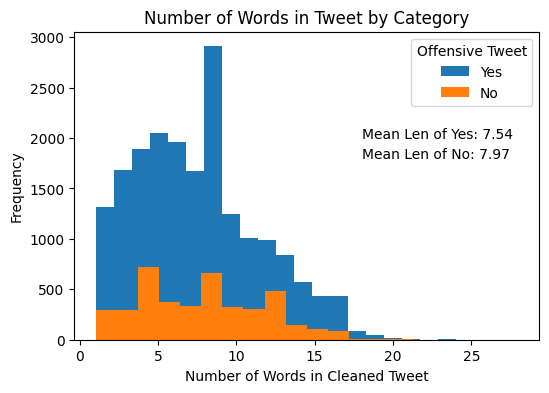

In [41]:
#plotting distrubution of words by category
plt.figure(figsize=(6, 4))
plt.hist(df[df["offensive"] == "Yes"]["Length"], bins=20, label="Yes")
plt.hist(df[df["offensive"] == "No"]["Length"], bins=20, label="No")
plt.title("Number of Words in Tweet by Category")
plt.xlabel("Number of Words in Cleaned Tweet")
plt.ylabel("Frequency")
plt.legend(title="Offensive Tweet")
plt.text(18, 2000, f"Mean Len of Yes: {len_yes:.2f}")
plt.text(18, 1800, f"Mean Len of No: {len_no:.2f}")

#saving the plot
plt.savefig("../../03_Plots/01_EDA_01_Len.png", dpi=300, bbox_inches="tight")

plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

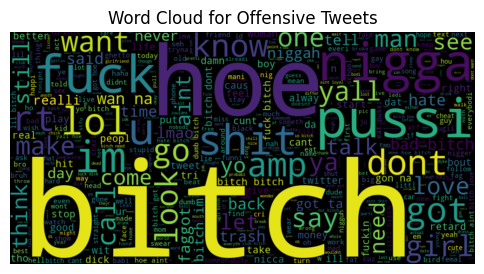

In [42]:
#Word cloud for offensive tweets
plt.figure(figsize=(6,4))
yes_words=' '.join(df2[df2['offensive']=="Yes"].clean_tweet.tolist())
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
yes_words=WC.generate(yes_words)
plt.imshow(yes_words,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Offensive Tweets')
plt.savefig('../../03_Plots/01_EDA_02_WC-yes.png',dpi=300,bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

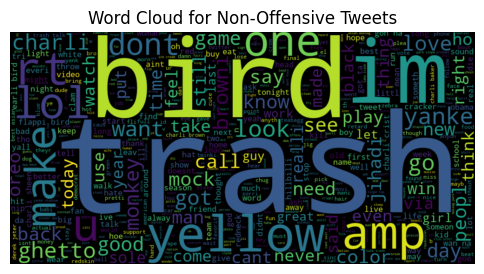

In [43]:
#Word cloud for non-offensive tweets
plt.figure(figsize=(6,4))
no_words=' '.join(df2[df2['offensive']=="No"].clean_tweet.tolist())
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
no_words=WC.generate(no_words)
plt.imshow(no_words,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Offensive Tweets')
plt.savefig('../../03_Plots/01_EDA_03_WC-no.png', dpi=300, bbox_inches='tight')
plt.show

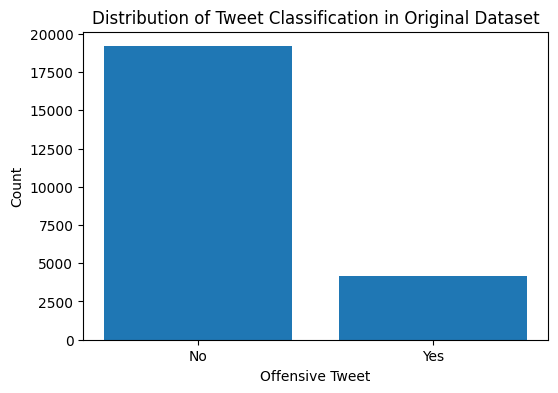

In [44]:
#Bar chartas of the distribution of classes in the original and model datasets
plt.figure(figsize=(6,4))
plt.bar(df2['offensive'].value_counts().index,df2['offensive'].value_counts().values)
plt.title('Distribution of Tweet Classification in Original Dataset')
plt.xlabel('Offensive Tweet')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])
plt.savefig('../../03_Plots/01_EDA_04_orginalClass.png', dpi=300, bbox_inches='tight')
plt.show()

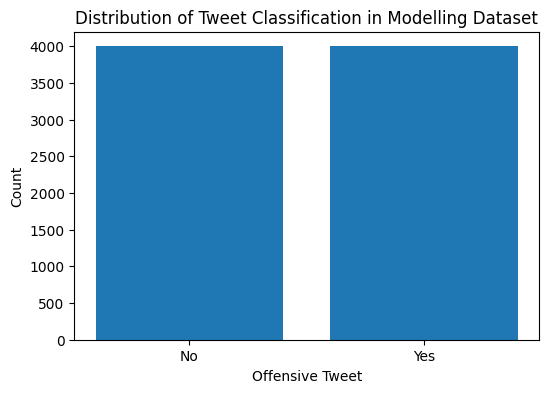

In [45]:
#Bar chartas of the distribution of classes in the original and model datasets
plt.figure(figsize=(6,4))
plt.bar(df3['offensive'].value_counts().index,df3['offensive'].value_counts().values)
plt.title('Distribution of Tweet Classification in Modelling Dataset')
plt.xlabel('Offensive Tweet')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])
plt.savefig('../../03_Plots/01_EDA_05_modelClass.png', dpi=300, bbox_inches='tight')
plt.show()